前两讲分别抛了硬币和骰子，这一节抛啥？还是抛硬币，而且要可劲儿的抛，那抛完硬币看啥？看硬币正面出现的概率，即$\frac{m}{N}$，这里$N$表示抛硬币的次数，$m=X_1+X_2+\cdots+X_N$，表示正面出现的次数，$X_i=1$表示正面，$X_i=0$表示反面，下面演示一下

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#首先定义抛一次硬币的过程
def toss_a_coin():
    return np.random.rand()<0.5 #假设正面的概率为0.5

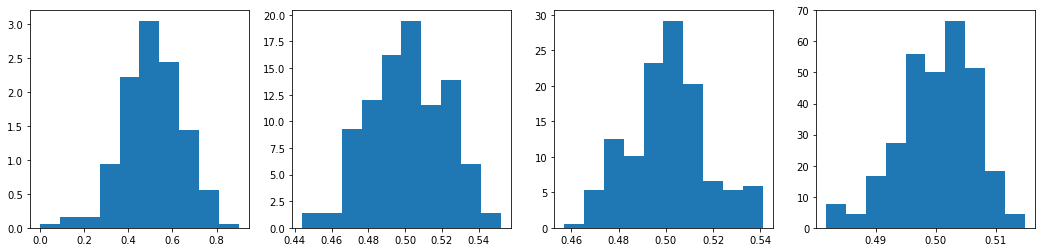

In [3]:
#定义次数
N=[10,500,1000,5000]
plt.figure(figsize = (18,4))
for index,num in enumerate(N):
    p=[]
    for _ in range(0,200):
        c=0
        for _ in range(0,num):
            c+=toss_a_coin() 
        p.append(c/num)
    plt.subplot(1,4,index+1)
    plt.hist(p,normed=True)

可以发现统计量$\frac{m}{N}$有服从正态分布的趋势，均值稳定在0.5，而方差越来越小（峰越来越尖）

### 一.正态分布的定义
对于一元变量的情况，正态分布可以写作：   

$$
N(x\mid\mu,\sigma^2)=\frac{1}{(2\pi\sigma^2)^{\frac{1}{2}}}exp\{-\frac{1}{2\sigma^2}(x-\mu)^2\}
$$  

其中，$\mu$是均值，$\sigma^2$是方差，对于$D$维向量$x$，它的高斯分布写作：   

$$
N(x\mid\mu,\Sigma)=\frac{1}{(2\pi)^{\frac{D}{2}}}\frac{1}{|\Sigma|^{\frac{1}{2}}}exp\{-\frac{1}{2}(x-\mu)^T\Sigma^{-1}(x-\mu)\}
$$  

其中，$\mu$是一个$D$维的均值向量，$\Sigma$是一个$D\times D$的协方差矩阵，$|\Sigma|$是$\Sigma$的行列式

#### 均值、协方差
下面直接写一下均值和协方差...
$$
E[x]=\mu\\
var[x]=E[(x-E[x])(x-E[x])^T]=\Sigma
$$   

#### 极大似然估计
$$
\mu_{ML}=\frac{1}{N}\sum_{i=1}^Nx_i\\
\Sigma_{ML}=\frac{1}{N}\sum_{i=1}^N(x_i-\mu_{ML})(x_i-\mu_{ML})^T
$$   

这里需要注意下协方差的极大似然估计是有偏的，即   

$$
E[\Sigma_{ML}]=\frac{N-1}{N}\Sigma
$$   

#### 条件概率分布以及边缘概率分布

对于多元高斯分布，它的条件概率分布以及边缘概率分布也是一个高斯分布，我们不妨将随机变量拆为两部分：     

$$
x=\binom{x_a}{x_b}
$$   

那么，对应的均值和协方差可以写作：    

$$
\mu=\binom{\mu_a}{\mu_b}\\
\Sigma=\begin{pmatrix}
\Sigma_{aa} & \Sigma_{ab}\\ 
\Sigma_{ba} & \Sigma_{bb}
\end{pmatrix}
$$   

有时为了方便表示，我们会直接用到协方差矩阵的逆，称为精度，可以写作：    

$$
\Lambda = \Sigma^{-1}=\begin{pmatrix}
\Lambda_{aa} & \Lambda_{ab}\\ 
\Lambda_{ba} & \Lambda_{bb}
\end{pmatrix}
$$   

那么**条件概率分布**公式：  

$$
p(x_a\mid x_b)=N(x_a\mid \mu_{a\mid b},\Lambda_{aa}^{-1})
$$   

这里，$\mu_{a\mid b}=\mu_a-\Lambda_{aa}^{-1}\Lambda_{ab}(x_b-\mu_b)$，接下来，**边缘概率分布**的公式：   

$$
p(x_a)=N(x_a\mid\mu_a,\Sigma_{aa})
$$   

如下图，左侧是两个变量上的高斯联合概率分布$p(x_a,x_b)$的轮廓线（绿色），右侧是边缘概率分布$p(x_a)$（蓝色）和$x_b=0.7$的条件概率分布$p(x_a\mid x_b)$（红色曲线）
![avatar](./source/12_高斯条件概率与边缘概率.png)

接下来，让我们继续看看正态分布的共轭先验...

### 二.共轭先验

这一节就只推导一维高斯分布的共轭先验，我们首先假设$\sigma^2$是已知的情况下，推导$\mu$的共轭先验，然后再假设$\mu$已知的情况下，推导$\sigma^2$的共轭先验，然后再假设$\mu,\sigma^2$均未知的情况下，推导其共轭先验

#### $\sigma^2$已知的情况
假设$\sigma^2$已知，我们有一组观测$X=\{x_1,x_2,...,x_N\}$，假设均值为$\mu$，那么此时的似然函数可以看做是关于$\mu$的函数：   

$$
p(X\mid\mu)=\prod_{i=1}^Np(x_n\mid\mu)=\frac{1}{(2\pi\sigma^2)^{\frac{N}{2}}}exp\{-\frac{1}{2\sigma^2}\sum_{n=1}^N(x_n-\mu)^2\}
$$   

接下来需要找到一个$p(u)$，让它与$p(X\mid\mu)$相乘后具有与$p(u)$相同的形式，显然$p(\mu)$同样选择一个高斯分布就可以满足，因为都只有指数部分含有$\mu$，而且是关于$\mu$的二次函数，这样就可以将他们整合在一起了，我们不妨假设先验概率分布如下：   

$$
p(\mu)=N(\mu\mid\mu_0,\sigma_0^2)
$$   

从而后验概率：   

$$
p(\mu\mid X)\propto p(X\mid\mu)p(\mu)
$$   

对指数部分进行配方整理后，可以得到后验概率分布的形式为：    

$$
p(\mu\mid X)=N(\mu\mid\mu_N,\sigma_N^2)
$$  

其中：   

$$
\mu_N=\frac{\sigma^2}{N\sigma_0^2+\sigma^2}\mu_0+\frac{N\sigma_0^2}{N\sigma_0^2+\sigma^2}\mu_{ML}\\
\frac{1}{\sigma_N^2}=\frac{1}{\sigma_0^2}+\frac{N}{\sigma^2}
$$  

这里$\mu_{ML}$是$\mu$的最大似然解，即：   

$$
\mu_{ML}=\frac{1}{N}\sum_{n=1}^Nx_n
$$  

通过上面的公式，我们可以得到一些有意思的结论：   

（1）当$N=0$时，后概率分布等于先验概率分布，这在我们意料之中；    
（2）当$N\rightarrow\infty$时，后验均值等于最大似然的均值，后验方差趋近于0，说明后验概率分布会在$\mu_{ML}$处形成一个尖峰；   
（3）当$N$固定，若$\sigma_0^2\rightarrow\infty$时，后验均值就变成了$\mu_{ML}$，这个容易理解，$\sigma_0^2\rightarrow\infty$时，先验分布很平，几乎不能提供有用的先验信息；   

下图演示了后验概率分布随着样本量$N$增加时的变化，其中$N=0$表示先验概率分布：   
![avatar](./source/12_高斯分布_均值的贝叶斯推断.png)

#### $\mu$已知的情况
当$\mu$已知时，我们的似然函数可以写作：   

$$
p(X\mid\lambda)=\prod_{n=1}^NN(x_n\mid\mu,\lambda^{-1})\propto\lambda^{\frac{N}{2}}exp[-\frac{\lambda}{2}\sum_{n=1}^N(x_n-\mu)^2]
$$  

其中，$\lambda=\frac{1}{\sigma^2}$，这里用精度表示，后续的推导会更方便，从上面的形式可以看出，对应的共轭先验分布应该满足：（1）正比于$\lambda$的幂指数；（2）同时正比于$\lambda$的线性函数的指数；这样的分布有的，那就是Gamma分布：   

$$
Gam(\lambda\mid a,b)=\frac{1}{\Gamma(a)}b^a\lambda^{a-1}exp(-b\lambda)
$$

不同$a,b$取值下的Gamma分布如下图：   
![avatar](./source/12_gamma分布.png)
直接说一下Gamma分布的均值为$E[\lambda]=\frac{a}{b}$，方差为$var[\lambda]=\frac{a}{b^2}$，接下来考虑一个后验分布的形式，假设我们已经定义了一个先验分布$Gam(\lambda\mid a_0,b_0)$，然后乘以上面的似然函数：   

$$
p(\lambda\mid X)\propto \lambda^{a_0-1}\lambda^{\frac{N}{2}}exp[-b_0\lambda-\frac{\lambda}{2}\sum_{n=1}^N(x_n-\mu)^2]
$$  

这显然也是一个Gamma分布的形式，不妨记为$Gam(\lambda\mid a_N,b_N)$，其中：   
$$
a_N=a_0+\frac{N}{2}\\
b_N=b_0+\frac{1}{2}\sum_{n=1}^N(x_n-\mu)^2=b_0+\frac{N}{2}\sigma_{ML}^2
$$

#### $\mu$和$\sigma^2$均未知的情况

大家可能已经能猜想到，这种情况下的共轭先验应该既与高斯分布相关，又与Gamma分布有关，下面推导一下：   

$$
p(X\mid\mu,\lambda)=\prod_{n=1}^N(\frac{\lambda}{2\pi})^{\frac{1}{2}}exp[-\frac{\lambda}{2}(x_n-\mu)^2]\\
\propto exp(-\frac{N\lambda\mu^2}{2}+\lambda\mu\sum_{n=1}^Nx_n)[\lambda^{\frac{N}{2}}exp(-\frac{\lambda}{2}\sum_{n=1}^Nx_n^2)]
$$  

可以发现，右侧$\lambda^{\frac{N}{2}}exp(-\frac{\lambda}{2}\sum_{n=1}^Nx_n^2)$是关于$\lambda$的Gamma分布的形式，左侧$exp(-\frac{N\lambda\mu^2}{2}+\lambda\mu\sum_{n=1}^Nx_n)$可以看做$\lambda$已知的关于$\mu$的高斯分布的形式，所以，我们的先验分布可以写作如下形式：   

$$
p(\mu,\lambda)=p(\mu\mid\lambda)p(\lambda)
$$  

其中$p(\mu\mid\lambda)$是一个高斯分布，$p(\lambda)$是一个Gamma分布，经过归一化整理，我们的先验分布可以写作如下形式：   

$$
p(\mu,\lambda)=N(\mu\mid\mu_0,(\beta\lambda)^{-1})Gam(\lambda\mid a,b)
$$  

这里，$\beta$是一个超参数，类比上面的样本量$N$，该分布也被称为**高斯-Gamma分布**